In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crsp = pd.read_csv("data/crsp_1926_2020.csv")
crsp = crsp[(crsp['SHRCD'] == 10) | (crsp['SHRCD']==11)]
crsp = crsp[(crsp['EXCHCD']==1) | (crsp['EXCHCD']==2) | (crsp['EXCHCD']==3)]
crsp.loc[crsp['PRC']<0, 'PRC'] = pd.NA

In [3]:
crsp

,PERMNO,date,SHRCD,EXCHCD,PRC,RET,SHROUT
1,10000,1986-01-31,10.0,3.0,<NA>,C,3680.0
2,10000,1986-02-28,10.0,3.0,<NA>,-0.257143,3680.0
3,10000,1986-03-31,10.0,3.0,<NA>,0.365385,3680.0
4,10000,1986-04-30,10.0,3.0,<NA>,-0.098592,3793.0
5,10000,1986-05-30,10.0,3.0,<NA>,-0.222656,3793.0
...,...,...,...,...,...,...,...
4705164,93436,2020-08-31,11.0,3.0,498.32001,0.741452,931809.0
4705165,93436,2020-09-30,11.0,3.0,429.01001,-0.139087,948000.0
4705166,93436,2020-10-30,11.0,3.0,388.04001,-0.095499,947901.0
4705167,93436,2020-11-30,11.0,3.0,567.59998,0.462736,947901.0


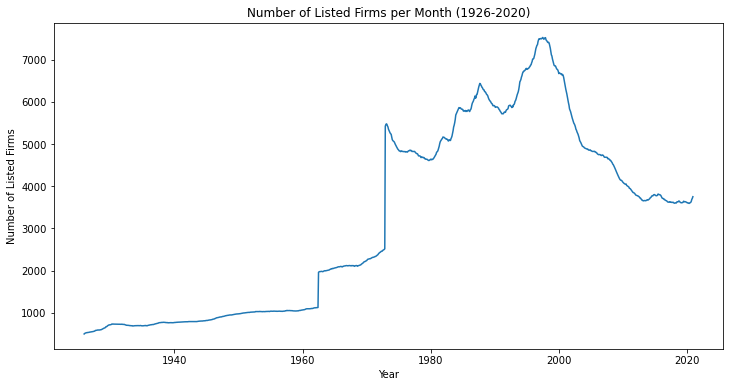

In [4]:
# Group by month and count unique permno
monthly_counts = crsp.groupby(pd.to_datetime(crsp['date']).dt.to_period('M'))['PERMNO'].nunique()

# Plot monthly counts over time
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_counts.index.to_timestamp(), monthly_counts.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Listed Firms')
ax.set_title('Number of Listed Firms per Month (1926-2020)')
plt.show()

In [5]:
crsp.to_csv("data/cleaned_crsp.csv")